In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
import tqdm
import time

np.random.seed(42)

## Implement logistic regression from scratch.


$$\textrm{log-likelihood, }\ell(\theta) = \log L(\theta) = \sum_{i=1}^n \left[ y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log (1 - h_\theta(x^{(i)})) \right]$$

$$ \mathbf{\implies \ell(\theta)} = \mathbf{Y}.log(\mathbf{h_\theta(X)}) + (1 - \mathbf{Y}). log(\mathbf{1 - h_\theta(X)}) $$


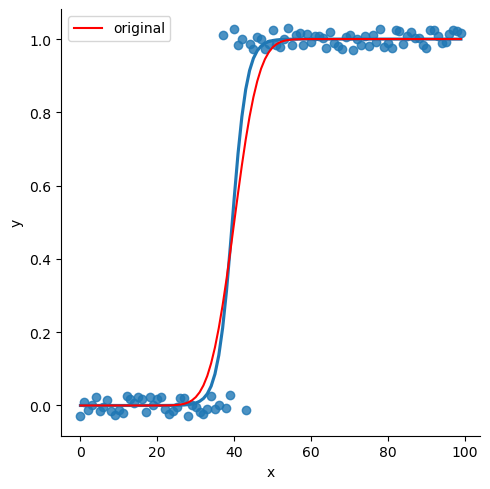

In [89]:
# for simplicity the dimensions of the data , X is 100, 1 only

# creating custom binary classification data
data_x = np.arange(0, 100)

# using the gaussian cdf to generate desired probabilities
probabilities = norm.cdf(data_x, loc=40, scale=5)
random_vals = np.random.random(data_x.shape)

data_y = np.where(random_vals < probabilities, 1, 0)

df = pd.DataFrame({'x': data_x, 'y': data_y})
sns.lmplot(x="x", y="y", data=df, logistic=True, ci=None, y_jitter=0.03)
plt.plot(data_x, probabilities, color='red', label='original')
plt.legend()

In [90]:
# intial theta
# theta_initial = np.array([2, -40], dtype='float64')
theta_initial = np.array([10, 10], dtype='float64')

# writing the function to be maximised
def sigmoid(x_i, theta):
    # introduce extra dimension for the constant part
    x_array = np.array([x_i, 1])
    return 1/(1 + np.exp(-np.dot(x_array, theta)))

def create_h_arr(x, theta):
    h_array =  np.array([sigmoid(x_i, theta) for x_i in x])  #TODO: way to vectorize?
    epsilon = 1e-8
    return np.clip(h_array, epsilon, 1-epsilon)

create_h_arr(data_x, theta_initial)

array([0.9999546 , 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999

In [91]:
# define the log likelihood function

def log_likelihood_fn(theta, x, y):
    h_array = create_h_arr(x, theta)
    log_likelihood = y.dot(np.log(h_array)) + (1-y).dot(np.log(1-h_array))
    
    return log_likelihood


for gradient ascent
$$ \theta : = \theta + \alpha \nabla_\theta \ell (\theta )$$
for stochastic gradient ascent
$$ \theta_j : = \theta_j + \alpha \big( y^{(i)} - h(x^{(i)}) \big)x_j^{(i)} $$

where $\alpha$ is the learning rate
$\theta$ in our case is of dimensions $(2,1)$

In [92]:
# class of all optimizers

class optimize:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def calculate_gradient(self, theta, x_i, y_i):
        """
        calculate gradient for 1 training example
        """
        x_arr = np.array([x_i, 1])
        grad = (y_i - sigmoid(x_i, theta))*x_arr

        return grad

    # def batch_gradient_ascent_step(self, theta, learning_rate):
    #     theta_new = theta
    #     for x_i, y_i in self.x, self.y:
    #         theta_new += learning_rate * self.calculate_gradient(theta, x_i, y_i)

    #     return theta_new
    
    # Stochastic gradient ascent using random indexes
    # def stochastic_gradient_ascent_step(self, theta, learning_rate):
    #     random_index = np.random.randint(0, self.x.shape[0])
    #     theta_new = theta + learning_rate * self.calculate_gradient(theta, self.x[random_index], self.y[random_index])
        
    #     return theta_new
    
    def calculate_mse(theta):
        pass

    def batch_gradient_ascent(self, theta_initial, learning_rate, epochs):
        t0 = time.time()
        theta = theta_initial.copy()
        theta_new = theta.copy()

        # storing history for displaying graph
        history_theta = np.zeros((epochs+1, theta.shape[0]))
        history_theta[0] = theta

        history_likelihood = np.zeros(epochs+1)
        history_likelihood[0] = log_likelihood_fn(theta, self.x, self.y)

        for epoch in range(epochs):
            for x_i, y_i in zip(self.x, self.y):
                theta_new += learning_rate * self.calculate_gradient(theta, x_i, y_i)
            
            theta = theta_new.copy()
            history_theta[epoch+1] = theta
            history_likelihood[epoch+1] = log_likelihood_fn(theta, self.x, self.y)
            # print(f"epoch {epoch} -> theta: {theta}")

        # plt.plot(history[:, 1], history[:, 0])
        plt.figure(1)
        plt.plot(history_theta[:, 0], color='red')
        plt.plot(history_theta[:, 1], color='green')

        plt.figure(2)
        plt.plot(history_likelihood)
        print(f'done in {time.time() - t0}s')

    def stochastic_gradient_ascent(self, theta_initial, learning_rate, epochs):
        t0 = time.time()
        theta = theta_initial.copy()
        for epoch in range(epochs):
            for x_i, y_i in zip(self.x, self.y):
                theta += learning_rate * self.calculate_gradient(theta, x_i, y_i)

            print(f"epoch {epoch} -> theta: {theta}")

        print(f'done in {time.time() - t0}s')

done in 1.768256664276123s


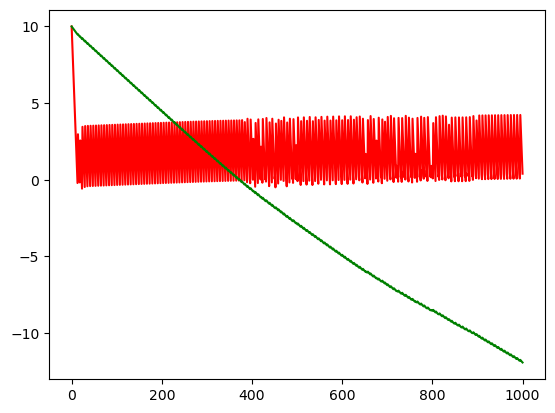

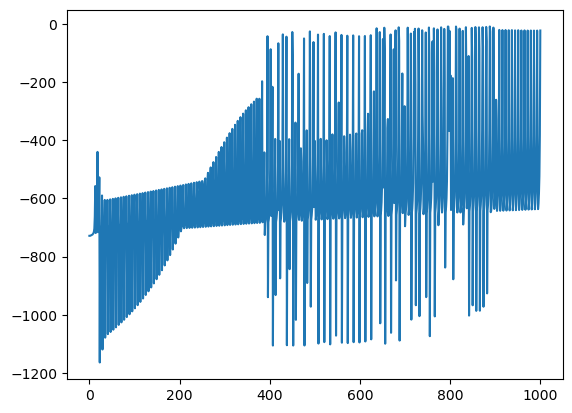

In [93]:
optimizer = optimize(data_x, data_y)

optimizer.batch_gradient_ascent(theta_initial, learning_rate=0.001, epochs=1000)

In [94]:
# plotting the actual graph

In [95]:
# plotting theta vs epochs

In [96]:
# plotting MSE vs epochs